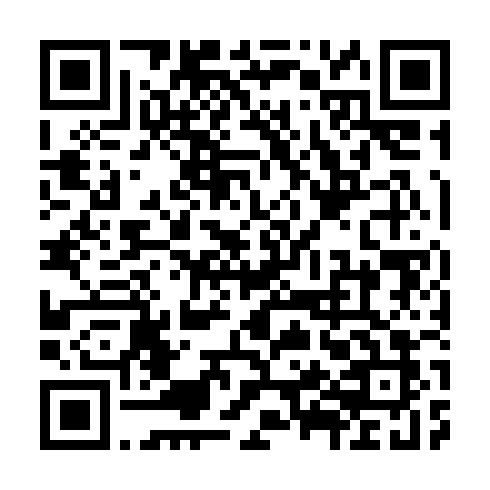

https://drive.google.com/file/d/1nx31xYQ--xEvGrgYWGpszvORTJq-mRbF/view?usp=sharing


База данных MNIST (сокращение от «Modified National Institute of Standards and Technology») — объёмная база данных образцов рукописного написания цифр. База данных является стандартом, предложенным Национальным институтом стандартов и технологий США с целью калибрации и сопоставления методов распознавания изображений с помощью машинного обучения в первую очередь на основе нейронных сетей.
_________
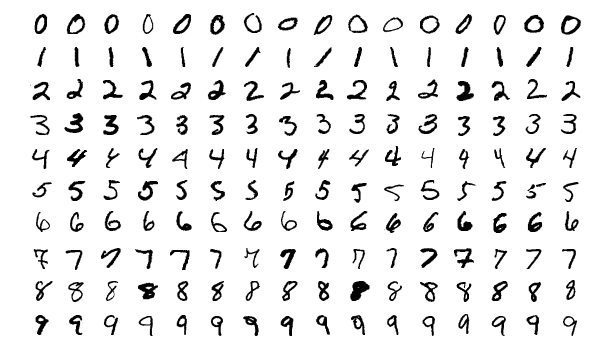


Будем работать с датасетом MNIST представленным  в виде CSV  файлов
первое значение - целевое, следующие 784 значений - уровень интенсивности черного цвета в пикселе. Каждый символ описан матрицей 28Х28 пикселей.

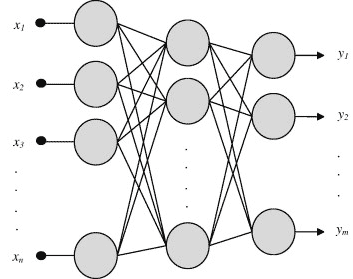

Нейронная сеть - трехслойная, полносвязная.

1 слой - входной, имеет 784 нейрона по нейрону на "пиксель"

2 слой - скрытый, от 50 нейронов

3 слой - выходной, 10 нейронов по количеству классов.

Все нейроны в сети имеют сигмоидальную функцию активации,  следовательно  выходной слой возвращает "вероятность" принадлежности  к тому или иному классу. Сумма веройтностей не обязаны быть равной 1

6


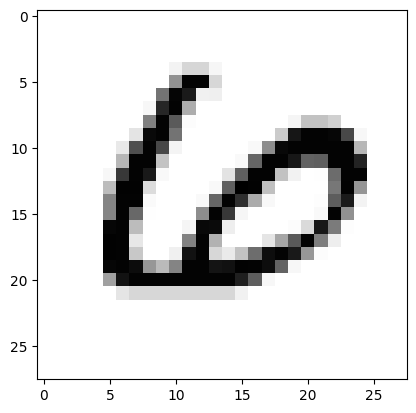

In [ ]:
import numpy as np
import matplotlib.pyplot

# открываем csv-файл и читаем оттуда.
training_data_file = open("sample_data/mnist_train_small.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# получаем массив чисел "элемента" под индексом 0
all_values = training_data_list[0].split(',')
print(all_values[0])
# рисуем содержимое
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array,cmap = 'Greys',interpolation='None')




In [ ]:
import numpy as np
import scipy.special

class NeuralNetwork:
  def __init__(self,eta=0.05,niter=1,inputnodes=784,hiddennodes=50,outputnodes=10):
    # количество нейронов в входном слое
    self.inodes = inputnodes
    # количество нейронов в скрытом слое
    self.hnodes = hiddennodes
    # количество нейронов в выходном слое
    self.onodes = outputnodes
    # весовые коэф. между входом и скрытым слоем
    self.wih = np.random.normal(0.0 , pow(self.hnodes,-0.5), (self.hnodes,self.inodes))
    # Весовые коэф. между скрытым слоем  выходом
    self.who = np.random.normal(0.0 , pow(self.onodes,-0.5), (self.onodes,self.hnodes))
    # скорость обучения
    self.eta = eta
    # сигмоида в качестве функции активации
    self.activation_function = lambda x: scipy.special.expit(x)
    # количество эпох обучения
    self.niter = niter
    pass

  def train(self, X, y):
    # преобразуем входые вектора признаков в двумерный массив
    X = np.array(X,ndmin=2).T
    # преобразуем вектор целевых значений в двумерный массив
    y = np.array(y, ndmin=2).T

    # рассчитываем входящие сигралы для скрытого слоя
    hidden_inputs = np.dot(self.wih,X)
    # Рассчитываем исходящие сигналы для скрытого слоя
    hidden_outputs = self.activation_function(hidden_inputs)

    # рассчитываем входящие сигналы для выходного слоя
    final_inputs = np.dot(self.who,hidden_outputs)
    # рассчитываем выходные значения
    final_outputs = self.activation_function(final_inputs)

    # считаем ошибку выходного слоя (целевое - выходное)
    output_errors = y - final_outputs
    # ошибка скрытого слоя
    hidden_errors = np.dot(self.who.T,output_errors)

    # обновляем  весовые коэф. для связей выходного и скрытого слоя
    self.who += self.eta * np.dot(output_errors * final_outputs * (1.0 - final_outputs),np.transpose(hidden_outputs))
    # обновляем  весовые коэф. для связей скрытого и входного слоев
    self.wih += self.eta * np.dot(hidden_errors * hidden_outputs * (1.0 - hidden_outputs),np.transpose(X))
    pass

  def predict(self,inputs_list):

    inputs = np.array(inputs_list, ndmin = 2).T
    hidden_inputs = np.dot(self.wih, inputs)
    # рассчитываем входящие сигналы для скрытого слоя
    hidden_outputs = self.activation_function(hidden_inputs)
    # рассчитываем исходящие сигналы для скрытого слоя
    final_inputs = np.dot(self.who, hidden_outputs)
    # рассчитываем исходящие сигналы для выходного слоя
    final_outputs = self.activation_function(final_inputs)
    return final_outputs


In [ ]:
# количество входных, скрытых, выходных слоев
input_nodes = 784
hidden_nodes = 10
output_nodes = 10

# коэффециент обучения
eta = 0.3
n_iter = 1


n = NeuralNetwork(eta,n_iter,input_nodes,hidden_nodes,output_nodes,)

# Обучаем сеть последовательно на каждом значении из датасета
for  record in training_data_list :
  all_values = record.split(',')
# масштабируем и смещаем входные значения
  inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
  #Подготавливаем целевой вектор
  targets = np.zeros(output_nodes) + 0.01
  targets[int(all_values[0])] = 0.99
  n.train(inputs, targets)


6


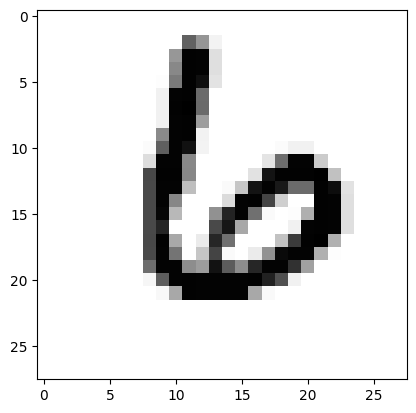

In [ ]:
test_num = 138
test_data_file = open("sample_data/mnist_test.csv",'r')
test_data_list = test_data_file.readlines()
test_data_file.close()
all_values = test_data_list[test_num].split(',')
print(all_values[0])

image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array,cmap = 'Greys',interpolation='None')

In [ ]:
# масштабируем и смещаем входные значения
r = n.predict((np.asfarray(all_values[1:])/255.0*0.99)+0.01)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print(r)

[[ 0.014]
 [ 0.008]
 [ 0.046]
 [ 0.001]
 [ 0.004]
 [ 0.004]
 [ 0.875]
 [ 0.001]
 [ 0.003]
 [ 0.003]]


In [ ]:
scorecard = []
for record in test_data_list :
  all_values = record.split(',')
  correct_label = int(all_values[0])
  print(int(correct_label), "истинный маркер")
  # масштабируем и смещаем входные значения
  inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
  outputs = n.predict(inputs)
  label = np.argmax(outputs)
  print(label,"ответи сети")
  if (label == correct_label):
    scorecard.append(1)
  else:
    scorecard.append(0)
    pass
pass

Выходные данные были обрезаны до нескольких последних строк (5000).
8 истинный маркер
8 ответи сети
3 истинный маркер
3 ответи сети
8 истинный маркер
8 ответи сети
6 истинный маркер
0 ответи сети
7 истинный маркер
7 ответи сети
0 истинный маркер
5 ответи сети
0 истинный маркер
0 ответи сети
1 истинный маркер
1 ответи сети
2 истинный маркер
2 ответи сети
3 истинный маркер
3 ответи сети
4 истинный маркер
4 ответи сети
5 истинный маркер
0 ответи сети
6 истинный маркер
6 ответи сети
7 истинный маркер
9 ответи сети
8 истинный маркер
8 ответи сети
9 истинный маркер
9 ответи сети
0 истинный маркер
0 ответи сети
1 истинный маркер
1 ответи сети
2 истинный маркер
2 ответи сети
3 истинный маркер
3 ответи сети
4 истинный маркер
4 ответи сети
5 истинный маркер
8 ответи сети
6 истинный маркер
6 ответи сети
7 истинный маркер
9 ответи сети
8 истинный маркер
8 ответи сети
9 истинный маркер
9 ответи сети
0 истинный маркер
0 ответи сети
1 истинный маркер
1 ответи сети
2 истинный маркер
2 ответи сети
3 ис

In [ ]:
scorecard_array = np.asarray(scorecard)
print("Эффективность = ", scorecard_array.sum()/scorecard_array.size)

Эффективность =  0.8212


Домашнее задание  на октябрь -
cоздать нейронную сеть для решения задач "MNIST" по данным  с сайта
www.kaggle.com
____
https://www.kaggle.com/zalando-research/fashionmnist
___
https://www.kaggle.com/fedesoriano/chinese-mnist-digit-recognizer
____
https://www.kaggle.com/c/Kannada-MNIST/data
_____
https://www.kaggle.com/datamunge/sign-language-mnist